In [118]:
!pip install ppscore

# importing necessary liberaries for data manupulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for data stadardization and data normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# for encoding data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# importing ppscore
import ppscore as pps

# importing isolation forest
from sklearn.ensemble import IsolationForest


In [119]:
# reading data

df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/EDA-2/adult_with_headers.csv')

# 1. Data Exploration and Preprocessing:

# EDA

In [120]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [121]:
# shape of data
df.shape

(32561, 15)

In [122]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [123]:
# statistical analysis of numerical columns

# age column is not normally distributed. it is positively skewed.
# fnlwgt column is not normally distributed. it is positively skewed.
# capital-gain column is not normally distributed. it is positively skewed.
# capital-loss column is not normally distributed. it is positively skewed.
# hours-per-week column is not normally distributed. it is positively skewed.

# missing values
# there is no missing values in all of these numerical columns

In [124]:
# statistical analysis
df.describe(include='object').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital_status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native_country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [125]:
# statistical analysis of categorical columns

# there is no missing values in any of the columns

In [126]:
# checking missing values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [127]:
# checking duplicated values

print(f'there are {df.duplicated().sum()} duplicated values')

there are 24 duplicated values


In [128]:
# removing duplicated datapoints
df.drop_duplicates(inplace=True)

In [129]:
# checking for duplicated values again
print(f'there are {df.duplicated().sum()} duplicated values')

there are 0 duplicated values


In [130]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [131]:
# checking for datatype of each of the columns
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [132]:
# list of column name present in the dataset
columns = df.columns.to_list()
columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [133]:
# unique values in each column
for i in columns:
    print(f'number of unique values in {i} column are {df[i].nunique()}')
    print(f'unique values in {i} column are {df[i].unique()}')
    print('--'*30)

number of unique values in age column are 73
unique values in age column are [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
------------------------------------------------------------
number of unique values in workclass column are 9
unique values in workclass column are [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
------------------------------------------------------------
number of unique values in fnlwgt column are 21648
unique values in fnlwgt column are [ 77516  83311 215646 ...  34066  84661 257302]
------------------------------------------------------------
number of unique values in education column are 16
unique values in education column are [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-ac

In [134]:
# list of categorical columns only
cat_colums = df.select_dtypes(include='object').columns.to_list()
cat_colums

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [135]:
# only numerical columns
num_columns = df.select_dtypes(exclude='object').columns.to_list()
num_columns

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [136]:
# Standard Scaling and Min-Max Scaling:

Standard Scaling: Preferred when the data is normally distributed and used with algorithms that assume Gaussian distribution. It handles outliers more gracefully but doesn't limit them to a fixed range.

Min-Max Scaling: Preferred when the data distribution is unknown or non-Gaussian, and used with algorithms that are distance-based. It scales the data to a fixed range but can be sensitive to outliers.

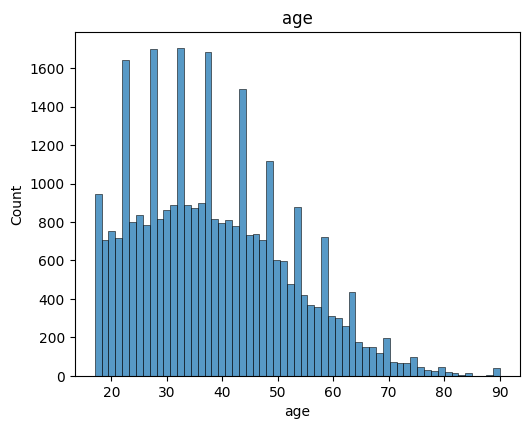

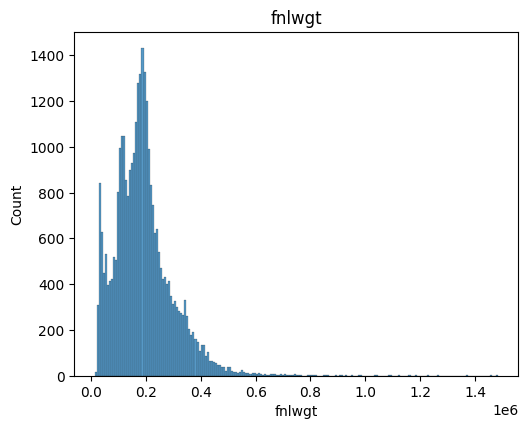

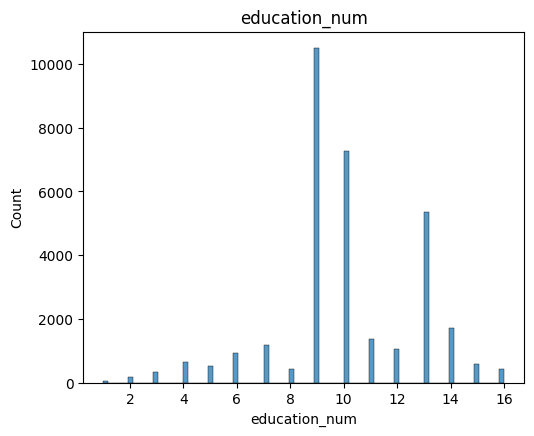

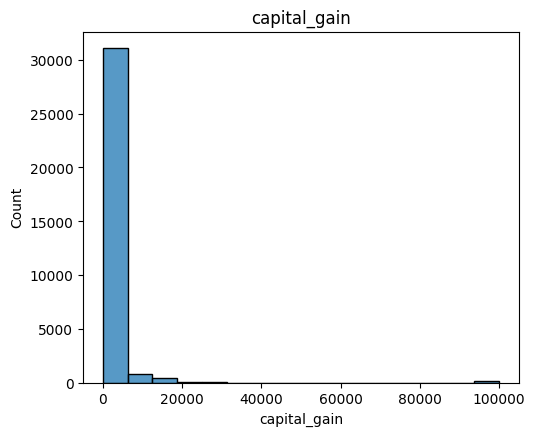

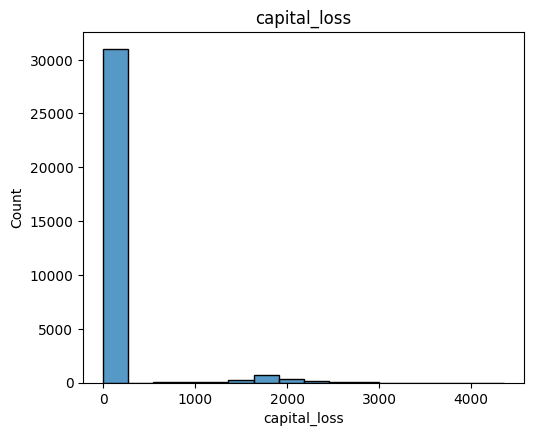

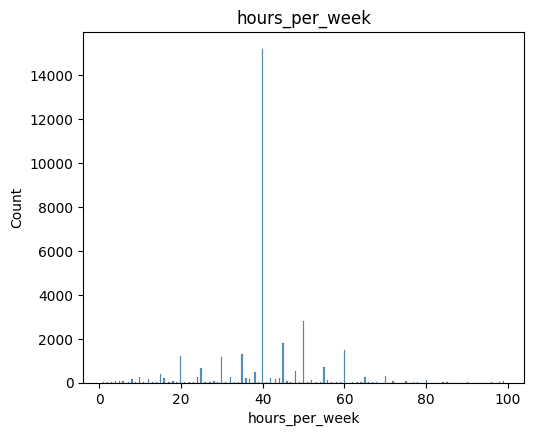

In [137]:
# plotting histogram for all the numerical columns using subplot
for i in range(len(num_columns)):
    plt.figure(figsize=(10, 12))
    plt.subplot(3,2,i+1)
    sns.histplot(df[num_columns[i]])
    plt.title(num_columns[i])
    plt.tight_layout()

#  standardization

In [138]:

sc = StandardScaler()
standard = sc.fit_transform(df[num_columns])
standard

array([[ 0.03038995, -1.06356884,  1.13477712,  0.14829174, -0.21674317,
        -0.03566374],
       [ 0.8369732 , -1.00866848,  1.13477712, -0.14597544, -0.21674317,
        -2.22248299],
       [-0.0429358 ,  0.24503992, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       ...,
       [ 1.42357919, -0.35877886, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       [-1.2161478 ,  0.11092955, -0.42067868, -0.14597544, -0.21674317,
        -1.65552985],
       [ 0.9836247 ,  0.92981187, -0.42067868,  1.88763548, -0.21674317,
        -0.03566374]])

In [139]:
# converting it into dataframe for better understanding
standard_df = pd.DataFrame(standard, columns=num_columns)
standard_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


# Normalization

In [140]:
norm = MinMaxScaler()
normalized = norm.fit_transform(df[num_columns])
normalized

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [141]:
# converting it to dataframe for better understanding
normalized_df = pd.DataFrame(normalized, columns=num_columns)
normalized_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


# 2. Encoding Techniques:

In [142]:
# ONE HOT Encoding AND LABEL ENCODING pros and cons:

# One-Hot Encoding transforms categorical variables into a series of binary columns. Each unique value of a categorical column becomes a separate column,
# which has 0 and 1 in it, wherein 1 indicating the presence of the category and a 0 for absence of value.
# one hot encoding is useful for those column which are having less number of unique values like upto around 5 to 6.
# more unique values leads to ctreate more number of columns which leads to curse of dimensionality
# One-Hot Encoding does not assume any inherent order or ranking among the categories, which is ideal for nominal data (categories without a meaningful order).
# The resulting data can be sparse, meaning many zeroes, which can be memory inefficient.

In [143]:
df.select_dtypes(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [144]:
# checking number of unique values in each categorical column
for col in cat_colums:
    print(f'column {col} is having {df[col].nunique()} values in it.')

column workclass is having 9 values in it.
column education is having 16 values in it.
column marital_status is having 7 values in it.
column occupation is having 15 values in it.
column relationship is having 6 values in it.
column race is having 5 values in it.
column sex is having 2 values in it.
column native_country is having 42 values in it.
column income is having 2 values in it.


In [145]:
# on this columns I am going to apply one hot encoding:

col_list = ['workclass', 'marital_status', 'relationship', 'race', 'sex']

print(f'the columns on which I am going to apply one hot encoding are :')
for i in col_list:
    print(i)

the columns on which I am going to apply one hot encoding are :
workclass
marital_status
relationship
race
sex


# one hot encoding using pandas

In [146]:
# one hot encoding using pandas

ohe_encoded = pd.get_dummies(df[col_list])
ohe_encoded

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32557,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32558,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32559,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


# label encoding using LabelEncoder

In [ ]:
# label encoding is generally used for ordinal data.
# it is recommended to use one hot encoding for target column only by sklearn liberary documentatio.
# it is used when algorithm's accuracy is primary goal.

In [147]:
leb_columns = ['workclass', 'education', 'occupation', 'relationship', 'native_country']
leb_columns

['workclass', 'education', 'occupation', 'relationship', 'native_country']

In [155]:
lebal_enco  = df[leb_columns]
lebal_enco

,workclass,education,occupation,relationship,native_country
0,State-gov,Bachelors,Adm-clerical,Not-in-family,United-States
1,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,United-States
2,Private,HS-grad,Handlers-cleaners,Not-in-family,United-States
3,Private,11th,Handlers-cleaners,Husband,United-States
4,Private,Bachelors,Prof-specialty,Wife,Cuba
...,...,...,...,...,...
32556,Private,Assoc-acdm,Tech-support,Wife,United-States
32557,Private,HS-grad,Machine-op-inspct,Husband,United-States
32558,Private,HS-grad,Adm-clerical,Unmarried,United-States
32559,Private,HS-grad,Adm-clerical,Own-child,United-States


In [160]:
# label encoding using LabelEncoder
for i in leb_columns:
    le = LabelEncoder()
    lebal_enco[i] = le.fit_transform(lebal_enco[i])
lebal_enco

<ipython-input-160-ca08afc916a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebal_enco[i] = le.fit_transform(lebal_enco[i])
<ipython-input-160-ca08afc916a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebal_enco[i] = le.fit_transform(lebal_enco[i])
<ipython-input-160-ca08afc916a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,workclass,education,occupation,relationship,native_country
0,7,9,1,1,39
1,6,9,4,0,39
2,4,11,6,1,39
3,4,1,6,0,39
4,4,9,10,5,5
...,...,...,...,...,...
32556,4,7,13,5,39
32557,4,11,7,0,39
32558,4,11,1,4,39
32559,4,11,1,3,39


In [161]:
# this is label encoded data
lebal_enco

,workclass,education,occupation,relationship,native_country
0,7,9,1,1,39
1,6,9,4,0,39
2,4,11,6,1,39
3,4,1,6,0,39
4,4,9,10,5,5
...,...,...,...,...,...
32556,4,7,13,5,39
32557,4,11,7,0,39
32558,4,11,1,4,39
32559,4,11,1,3,39


In [166]:
# let's see the number of unique values in each column
for i in leb_columns:
  print(f'column is having {lebal_enco[i].nunique()} unique values which are labels for each unique values given by label encoder')
  print(f'{lebal_enco[i].unique()}')
  print('--'*30)

column is having 9 unique values which are labels for each unique values given by label encoder
[7 6 4 1 2 0 5 8 3]
------------------------------------------------------------
column is having 16 unique values which are labels for each unique values given by label encoder
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
------------------------------------------------------------
column is having 15 unique values which are labels for each unique values given by label encoder
[ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
------------------------------------------------------------
column is having 6 unique values which are labels for each unique values given by label encoder
[1 0 5 3 4 2]
------------------------------------------------------------
column is having 42 unique values which are labels for each unique values given by label encoder
[39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]
-------------

# FEATURE ENGINEERING

In [ ]:
# new feature 1
# total income = capital_gain + capital_loss

In [167]:
df['total income'] = df['capital_gain'] + df['capital_loss']
df['total income']

,total income
0,2174
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,0
32559,0


Rationale: This feature combines 'capital-gain' and 'capital-loss' with existing income to provide a more holistic view of an individual's financial situation, potentially enhancing model accuracy for income-based predictions (like income bracket or loan eligibility).

In [ ]:
# new feature 2
# workclass_education -> workclass + '_' + education

In [168]:
df['workclass_education'] = df['workclass'] + '_' + df['education']
df['workclass_education']

,workclass_education
0,State-gov_ Bachelors
1,Self-emp-not-inc_ Bachelors
2,Private_ HS-grad
3,Private_ 11th
4,Private_ Bachelors
...,...
32556,Private_ Assoc-acdm
32557,Private_ HS-grad
32558,Private_ HS-grad
32559,Private_ HS-grad


Rationale: This combined feature aims to capture the interaction effect between an individual's education level and their workclass. Certain education levels might be more prevalent or impactful within specific work environments.

In [ ]:
# binary

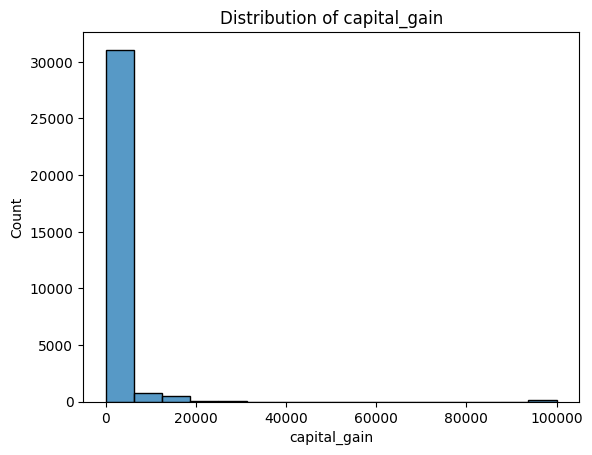

Skewness of capital_gain: 11.949402833551463


In [169]:
# Assuming 'df' is your DataFrame and 'skewed_feature' is the column name
sns.histplot(df['capital_gain'])
plt.title('Distribution of capital_gain')
plt.show()

# Calculate skewness
skewness = df['capital_gain'].skew()
print(f"Skewness of capital_gain: {skewness}")

In [ ]:
# as I can see that this column is highly skewed

In [170]:
# applying log transformation
df['capital_gain'] = np.log1p(df['capital_gain'])
df['capital_gain']

,capital_gain
0,7.684784
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
32556,0.000000
32557,0.000000
32558,0.000000
32559,0.000000


#4. Feature Selection

In [ ]:
#  Use the Isolation Forest algorithm to identify and remove outliers.
#  Discuss how outliers can affect model performance.

In [174]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,total income,workclass_education
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0,40,United-States,<=50K,2174,State-gov_ Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K,0,Self-emp-not-inc_ Bachelors
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K,0,Private_ HS-grad
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K,0,Private_ 11th
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K,0,Private_ Bachelors


In [178]:
# defining x and y variables
x = df.drop('income', axis=1)
y = df['income']
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,total income,workclass_education
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0,40,United-States,2174,State-gov_ Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,0,Self-emp-not-inc_ Bachelors
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,0,Private_ HS-grad
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,0,Private_ 11th
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,0,Private_ Bachelors


In [181]:
categorical_col = x.select_dtypes(include='object').columns.to_list()
categorical_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'workclass_education']

In [182]:
# applying one hot encoding on categorical data
data_new = pd.get_dummies(data=x, columns=categorical_col,dtype=int)
data_new

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,total income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,workclass_education_ State-gov_ Doctorate,workclass_education_ State-gov_ HS-grad,workclass_education_ State-gov_ Masters,workclass_education_ State-gov_ Preschool,workclass_education_ State-gov_ Prof-school,workclass_education_ State-gov_ Some-college,workclass_education_ Without-pay_ 7th-8th,workclass_education_ Without-pay_ Assoc-acdm,workclass_education_ Without-pay_ HS-grad,workclass_education_ Without-pay_ Some-college
0,39,77516,13,7.684784,0,40,2174,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,0.000000,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,0.000000,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,234721,7,0.000000,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,338409,13,0.000000,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0.000000,0,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,40,154374,9,0.000000,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,58,151910,9,0.000000,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,22,201490,9,0.000000,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
# applying isolation forest on

iso = IsolationForest(contamination=0.05)
iso.fit(data_new)
ypred = iso.predict(data_new)
ypred

array([1, 1, 1, ..., 1, 1, 1])

In [187]:
df['outlier/normal'] = ypred
df['outlier/normal']

,outlier/normal
0,1
1,1
2,1
3,1
4,1
...,...
32556,1
32557,1
32558,1
32559,1


In [188]:
df['outlier/normal'].value_counts()

,outlier/normal
1,30910
-1,1627


In [ ]:
# there are total 30910 nornal datapoints labelled as (1) and
#  1627 are the outlier datapoints labeled as (-1)

# PREDICITVE POWER SCORE

In [189]:
# applying pps to know the correlation between independent features and target columns

feature_sel = pps.matrix(df)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,2.090038e-02,classification,True,weighted F1,0.581447,0.590195,DecisionTreeClassifier()
2,age,fnlwgt,0.000000e+00,regression,True,mean absolute error,75736.243800,77225.235712,DecisionTreeRegressor()
3,age,education,6.124723e-02,classification,True,weighted F1,0.189800,0.239423,DecisionTreeClassifier()
4,age,education_num,0.000000e+00,regression,True,mean absolute error,1.865200,1.906863,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
319,outlier/normal,native_country,2.340301e-07,classification,True,weighted F1,0.850030,0.850030,DecisionTreeClassifier()
320,outlier/normal,income,1.260964e-07,classification,True,weighted F1,0.646362,0.646362,DecisionTreeClassifier()
321,outlier/normal,total income,0.000000e+00,regression,True,mean absolute error,1245.773200,2145.481219,DecisionTreeRegressor()
322,outlier/normal,workclass_education,0.000000e+00,classification,True,weighted F1,0.102000,0.096185,DecisionTreeClassifier()


In [192]:
# I want to see only those combination where y is target column
feature_sel = feature_sel[(feature_sel['y'] == 'income') & (feature_sel['x'] != 'income')]
feature_sel

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
14,age,income,1.685320e-02,classification,True,weighted F1,0.646362,0.652322,DecisionTreeClassifier()
32,workclass,income,1.092573e-01,classification,True,weighted F1,0.646362,0.684999,DecisionTreeClassifier()
50,fnlwgt,income,0.000000e+00,classification,True,weighted F1,0.646362,0.641101,DecisionTreeClassifier()
68,education,income,2.471221e-01,classification,True,weighted F1,0.646362,0.733754,DecisionTreeClassifier()
86,education_num,income,2.471221e-01,classification,True,weighted F1,0.646362,0.733754,DecisionTreeClassifier()
104,marital_status,income,0.000000e+00,classification,True,weighted F1,0.646362,0.646166,DecisionTreeClassifier()
122,occupation,income,4.651070e-02,classification,True,weighted F1,0.646362,0.662810,DecisionTreeClassifier()
140,relationship,income,1.260964e-07,classification,True,weighted F1,0.646362,0.646362,DecisionTreeClassifier()
158,race,income,1.260964e-07,classification,True,weighted F1,0.646362,0.646362,DecisionTreeClassifier()
176,sex,income,1.260964e-07,classification,True,weighted F1,0.646362,0.646362,DecisionTreeClassifier()


In [193]:
# sorting the columns on the basis of pps score
ppscore = feature_sel.sort_values('ppscore', ascending=False)
ppscore

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
284,total income,income,4.152998e-01,classification,True,weighted F1,0.646362,0.793228,DecisionTreeClassifier()
194,capital_gain,income,3.194126e-01,classification,True,weighted F1,0.646362,0.759318,DecisionTreeClassifier()
302,workclass_education,income,2.814888e-01,classification,True,weighted F1,0.646362,0.745907,DecisionTreeClassifier()
68,education,income,2.471221e-01,classification,True,weighted F1,0.646362,0.733754,DecisionTreeClassifier()
86,education_num,income,2.471221e-01,classification,True,weighted F1,0.646362,0.733754,DecisionTreeClassifier()
212,capital_loss,income,1.378885e-01,classification,True,weighted F1,0.646362,0.695124,DecisionTreeClassifier()
32,workclass,income,1.092573e-01,classification,True,weighted F1,0.646362,0.684999,DecisionTreeClassifier()
122,occupation,income,4.651070e-02,classification,True,weighted F1,0.646362,0.662810,DecisionTreeClassifier()
14,age,income,1.685320e-02,classification,True,weighted F1,0.646362,0.652322,DecisionTreeClassifier()
248,native_country,income,9.880092e-03,classification,True,weighted F1,0.646362,0.649856,DecisionTreeClassifier()


In [ ]:
# total income column is having the highest impact and fnlwgt column is having the least impact on the target(income) column

In [150]:
# comparision between ppscore and correlation matrix:

# Predictive Power Score (PPS): Measures the ability of one feature to predict another.
#  It's not limited to linear relationships and can handle categorical features.
# Correlation Matrix: Measures the linear relationship between numerical features.
#  It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation).